In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
from glob import glob
from matplotlib import pyplot as plt
from pymea import plotting
from pymea import matlab_compatibility as mc

In [3]:
data_path = '/home/sean/mea data/028/028_spk_freq_table.csv'
data_table = pd.read_csv(data_path)
time_vector = data_table['time'].map(mc.datetime_str_to_datetime)

In [4]:
def is_top(unit_name):
    row = mc.get_row_number(unit_name)
    if row <= 3:
        return 1
    else:
        return False
    
def is_bottom(unit_name):
    row = mc.get_row_number(unit_name)
    if row > 3:
        return True
    else:
        return False

cond_filt = {
    'media_change': is_bottom,
    'no_change': is_top
}

cat_table = plotting.construct_categorized_dataframe(data_table, cond_filt)
cat_table['spike_freq'] = cat_table['spike_freq']/60 # convert from spikes/1 minute to spikes/sec
cat_table['spike_freq'] = plotting.smooth(cat_table['spike_freq'], kernel_size=5) # smooth using a 5 minute kernel

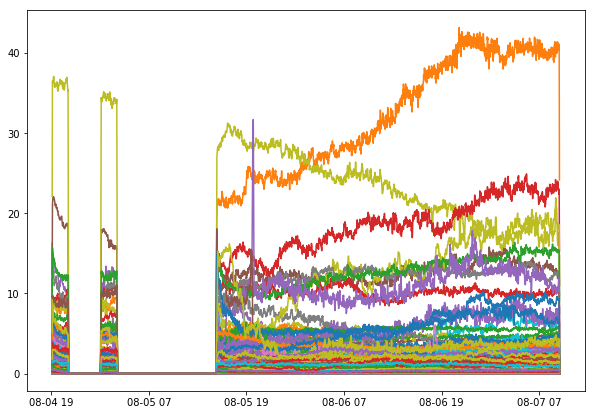

In [6]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table)

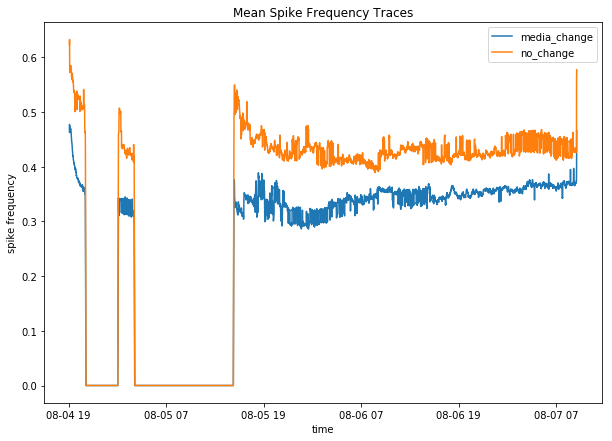

In [47]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table.query('spike_freq < 10'))

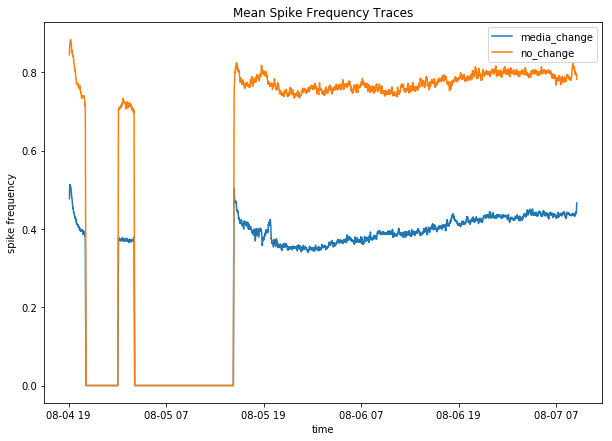

In [68]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table.query('unit_name > "B1111"'))

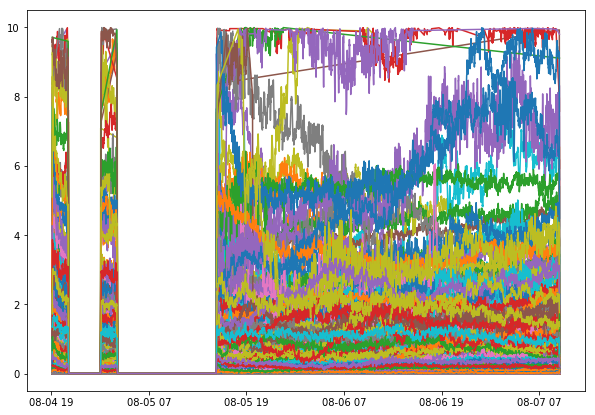

In [8]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('spike_freq < 10'))

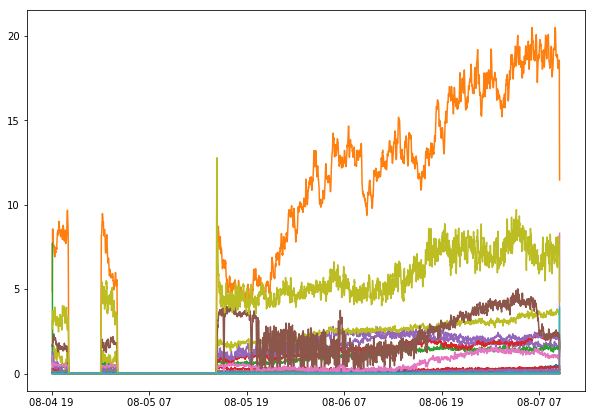

In [81]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name < "B1111"'))

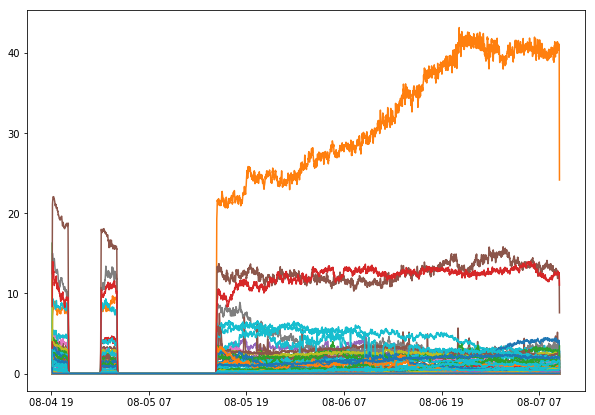

In [85]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name >= "B1111" and unit_name < "C1111"'))

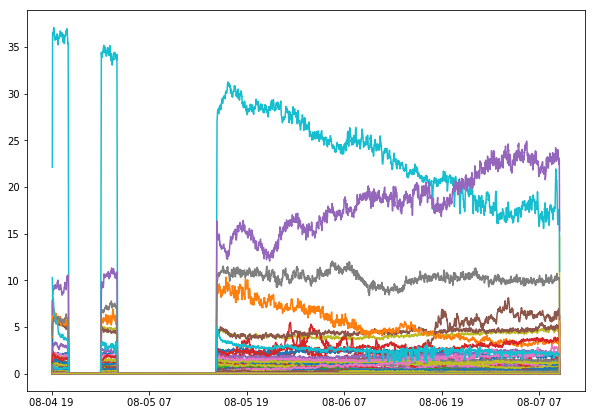

In [86]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name >= "C1111" and unit_name < "D1111"'))

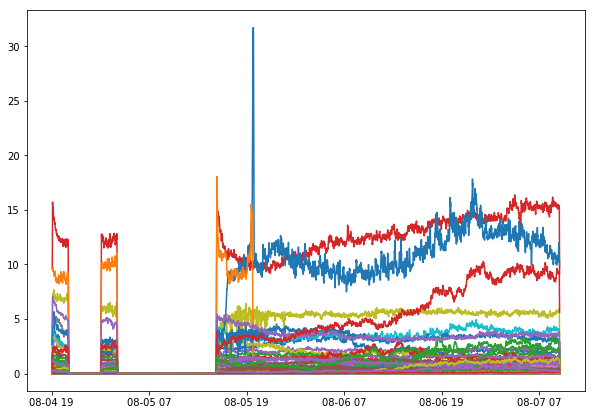

In [88]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name >= "D1111" and unit_name < "E1111"'))

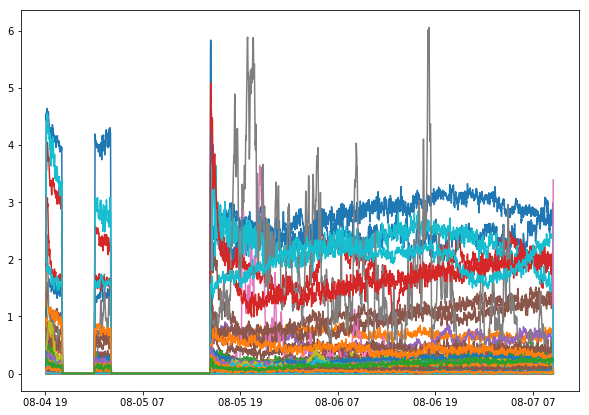

In [87]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name >= "E1111" and unit_name < "F1111"'))

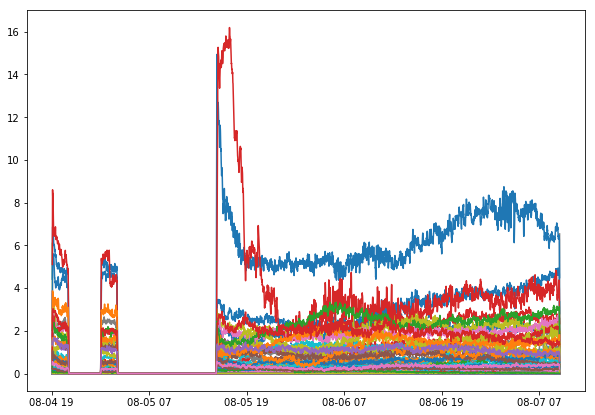

In [84]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name >= "F1111"'))

In [139]:
def overshootHists(condition_command):
    c = cat_table.query(condition_command)
    b = baseline_table.query(condition_command)
    #s = stim_table.query(condition_command)
    e = end_table.query(condition_command) 



    baselines = []
    ends=[]
    ratios = []
    stims=[]

    for unit_name in c['unit_name'].unique():
        unit = c.query('unit_name == @unit_name')
        unit_b = b.query('unit_name == @unit_name')
        #unit_s = s.query('unit_name == @unit_name')
        unit_e = e.query('unit_name == @unit_name')
        meanOfBaseline = np.mean(unit_b['spike_freq'])
        varOfBaseline = (max(unit_b['spike_freq'])-min(unit_b['spike_freq']))/meanOfBaseline
        #meanAfterDrug = np.mean(unit_s[0:60]['spike_freq'])
    
        #if meanOfBaseline<meanAfterDrug and varOfBaseline < 2.5 and meanOfBaseline > 0.001: 
        if meanOfBaseline > 0.001 and meanOfBaseline < 10: #varOfBaseline < 10 and 
            baselines.append(meanOfBaseline)
            meanOfEnd = np.mean(unit_e['spike_freq'])
            ends.append(meanOfEnd)
            ratios.append(meanOfEnd/meanOfBaseline)
            #stims.append(meanAfterDrug/meanOfBaseline)
    
        #else:
           # continue

    plt.hist(ratios, bins = np.logspace(np.log10(0.001), np.log10(100)))
    plt.title('end/baseline')
    plt.xscale('log')
    plt.axvline(x=1, color='black')
    plt.show()
    #plt.hist(stims, bins = np.logspace(np.log10(0.001), np.log10(100)))
    #plt.xscale('log')
    #plt.title('after stim/baseline')
    #plt.axvline(x=1, color='black')


/home/sean/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


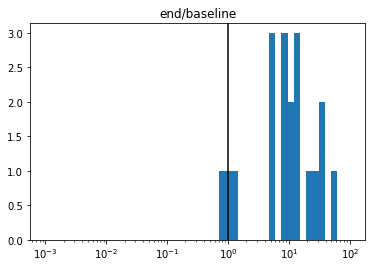

In [143]:
baseline_table = cat_table.query('time > "2017-08-05 00:04:00" and time < "2017-08-05 06:04:00"')
end_table = cat_table.query('time > "2017-08-07 03:30:00"')
overshootHists('unit_name < "B1111"')

/home/sean/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


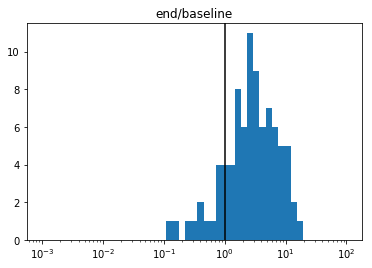

In [133]:
overshootHists('unit_name >= "B1111" and unit_name < "C1111"')

/home/sean/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


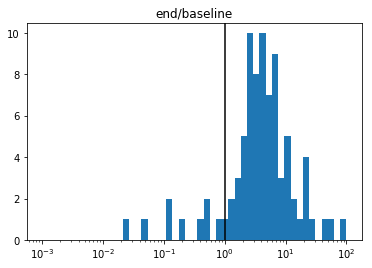

In [134]:
overshootHists('unit_name >= "C1111" and unit_name < "D1111"')

/home/sean/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


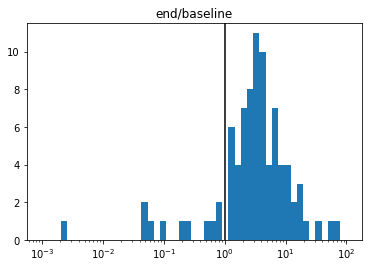

In [135]:
overshootHists('unit_name >= "D1111" and unit_name < "E1111"')

/home/sean/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


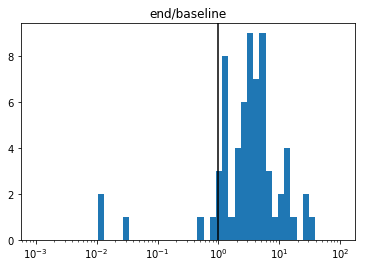

In [136]:
overshootHists('unit_name >= "E1111" and unit_name < "F1111"')

/home/sean/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


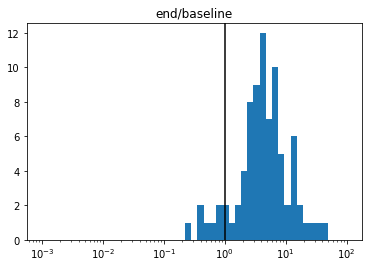

In [137]:
overshootHists('unit_name >= "F1111"')

/home/sean/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


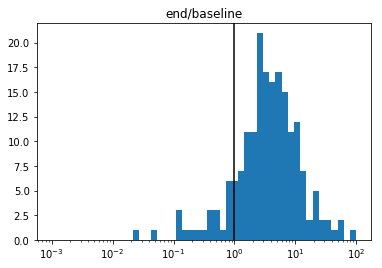

In [145]:
overshootHists('unit_name < "D1111"')

/home/sean/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


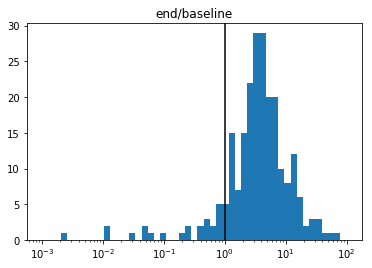

In [144]:
overshootHists('unit_name >= "D1111"')

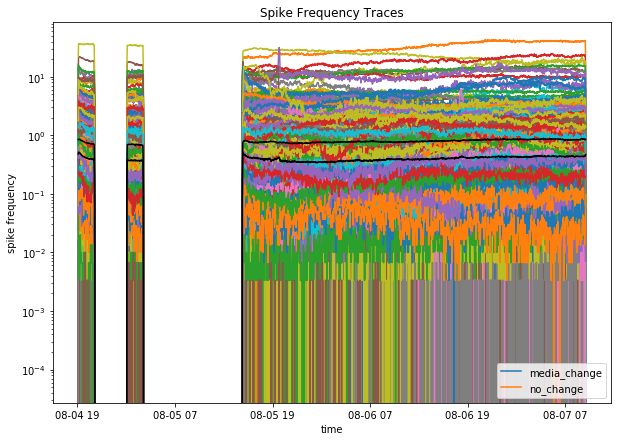

In [5]:
plt.figure(figsize = (10,7))
plotting.plot_unit_traces_plus_means(cat_table)

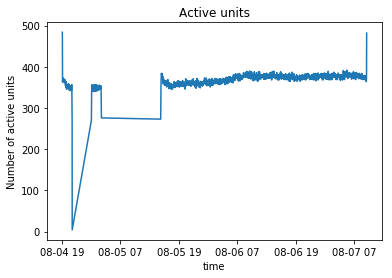

In [13]:
plotting.count_active_neurons(cat_table, 0.01, 0)